# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


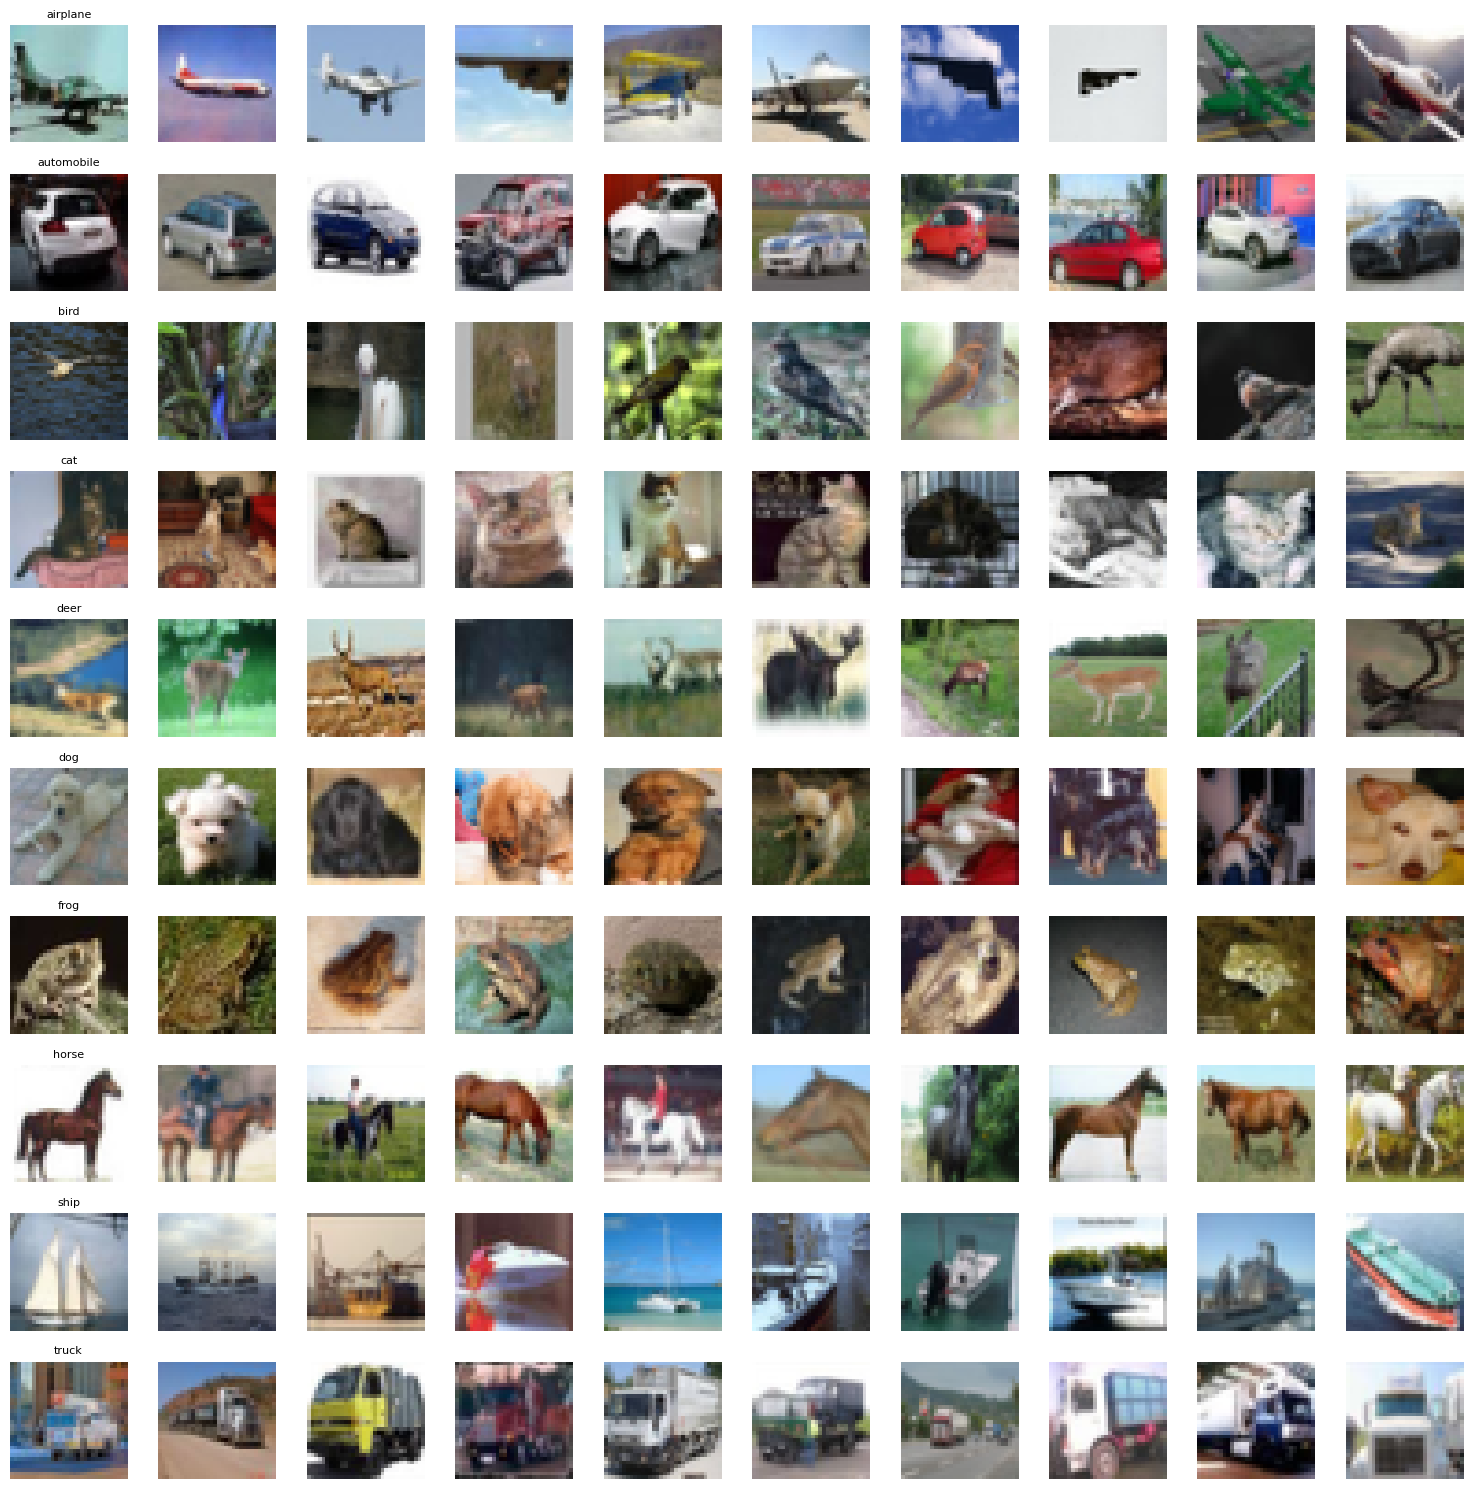

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15, 15))

for i, label in enumerate(range(10)):
    idxs = np.where(y_train.flatten() == label)[0]
    for j, img_idx in enumerate(np.random.choice(idxs, 10, replace=False)):
        plt.subplot(10, 10, i * 10 + j + 1)
        plt.imshow(x_train[img_idx])
        plt.title(class_names[label] if j == 0 else '', fontsize=8)
        plt.axis('off')
plt.tight_layout()
plt.show()

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [5]:
from keras.backend import clear_session
clear_session()

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential([
    Conv2D(32, (3, 3), activation = "relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

Metal device set to: Apple M4

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2025-07-12 12:58:49.267121: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-12 12:58:49.267830: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [9]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = "sgd",
    metrics = ["accuracy"],
)

history = model.fit(
    x_train_norm, y_train_cat,
    epochs = 50,
    batch_size = 512,
    validation_data = (x_test_norm, y_test_cat)
)



Epoch 1/50


2025-07-12 14:05:46.282759: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2025-07-12 14:05:46.572273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - ETA: 0s - loss: 2.2251 - accuracy: 0.1907

2025-07-12 14:05:49.691521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - 4s 29ms/step - loss: 2.2251 - accuracy: 0.1907 - val_loss: 2.1562 - val_accuracy: 0.2337
Epoch 2/50
98/98 [==============================] - 2s 23ms/step - loss: 2.0884 - accuracy: 0.2691 - val_loss: 2.0341 - val_accuracy: 0.2733
Epoch 3/50
98/98 [==============================] - 2s 23ms/step - loss: 1.9873 - accuracy: 0.3053 - val_loss: 1.9539 - val_accuracy: 0.3104
Epoch 4/50
98/98 [==============================] - 2s 23ms/step - loss: 1.9217 - accuracy: 0.3301 - val_loss: 1.9138 - val_accuracy: 0.3350
Epoch 5/50
98/98 [==============================] - 2s 24ms/step - loss: 1.8847 - accuracy: 0.3428 - val_loss: 1.8769 - val_accuracy: 0.3324
Epoch 6/50
98/98 [==============================] - 2s 23ms/step - loss: 1.8506 - accuracy: 0.3556 - val_loss: 1.8312 - val_accuracy: 0.3617
Epoch 7/50
98/98 [==============================] - 2s 23ms/step - loss: 1.8194 - accuracy: 0.3670 - val_loss: 1.8064 - val_accuracy: 0.3642
Epoch 8/50
98/98 [======

*   Plot the cross entropy loss curve and the accuracy curve

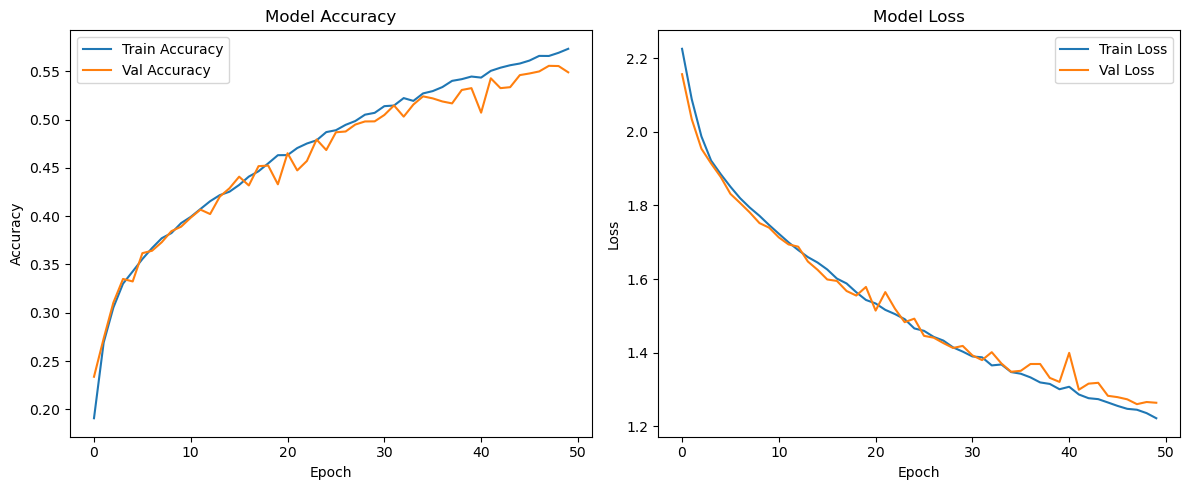

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [11]:
from keras.backend import clear_session
clear_session()

In [12]:
vgg_model = Sequential([
    Conv2D(32, (3, 3), activation = "relu", padding = "same", input_shape = (32, 32, 3)),
    Conv2D(32, (3, 3), activation = "relu", padding = "same"),
    MaxPooling2D(pool_size = (2, 2)),
    Flatten(),
    Dense(128, activation = "relu"),
    Dense(10, activation = "softmax")
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [14]:
vgg_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = "sgd",
    metrics = ["accuracy"],
)
vgg_history = vgg_model.fit(
    x_train_norm, y_train_cat,
    epochs = 50,
    batch_size = 512,
    validation_data = (x_test_norm, y_test_cat)
)

Epoch 1/50


2025-07-12 14:18:22.312366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - ETA: 0s - loss: 2.2523 - accuracy: 0.1707

2025-07-12 14:18:26.201185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - 4s 39ms/step - loss: 2.2523 - accuracy: 0.1707 - val_loss: 2.1721 - val_accuracy: 0.2344
Epoch 2/50
98/98 [==============================] - 3s 35ms/step - loss: 2.0741 - accuracy: 0.2677 - val_loss: 2.0057 - val_accuracy: 0.2863
Epoch 3/50
98/98 [==============================] - 3s 34ms/step - loss: 1.9781 - accuracy: 0.2988 - val_loss: 1.9252 - val_accuracy: 0.3256
Epoch 4/50
98/98 [==============================] - 3s 35ms/step - loss: 1.9040 - accuracy: 0.3306 - val_loss: 1.8542 - val_accuracy: 0.3579
Epoch 5/50
98/98 [==============================] - 3s 35ms/step - loss: 1.8440 - accuracy: 0.3551 - val_loss: 1.8068 - val_accuracy: 0.3727
Epoch 6/50
98/98 [==============================] - 3s 34ms/step - loss: 1.7979 - accuracy: 0.3724 - val_loss: 1.8337 - val_accuracy: 0.3593
Epoch 7/50
98/98 [==============================] - 3s 34ms/step - loss: 1.7676 - accuracy: 0.3826 - val_loss: 1.7605 - val_accuracy: 0.3704
Epoch 8/50
98/98 [======

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

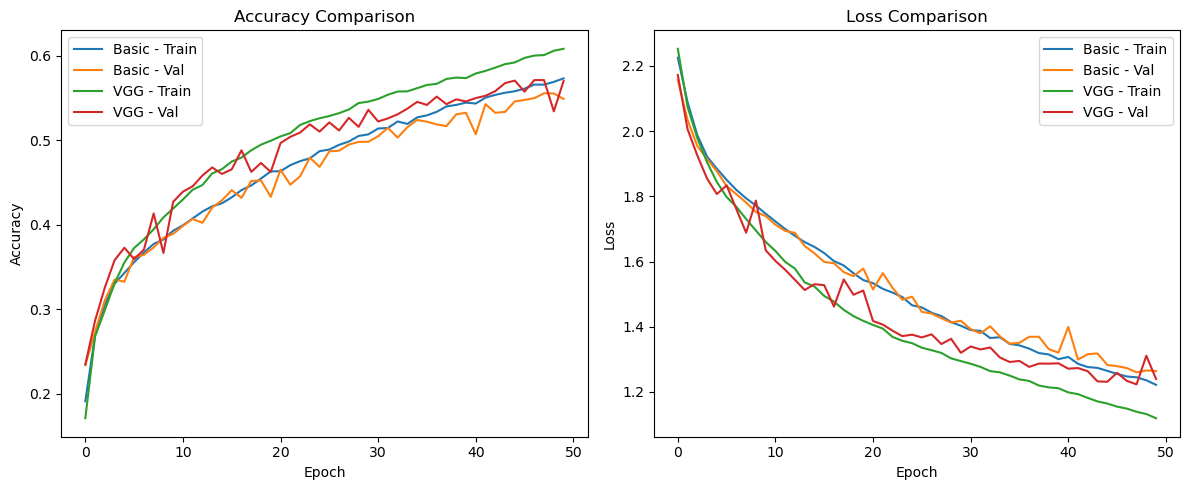

In [15]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Basic - Train')
plt.plot(history.history['val_accuracy'], label='Basic - Val')
plt.plot(vgg_history.history['accuracy'], label='VGG - Train')
plt.plot(vgg_history.history['val_accuracy'], label='VGG - Val')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Basic - Train')
plt.plot(history.history['val_loss'], label='Basic - Val')
plt.plot(vgg_history.history['loss'], label='VGG - Train')
plt.plot(vgg_history.history['val_loss'], label='VGG - Val')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Comment on the observation**

*the VGG model did not perform better 

*both of the models have similar validation accuracy

*the VGG model has a higher validation loss


...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


 24/313 [=>............................] - ETA: 1s

2025-07-12 14:34:21.195748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step


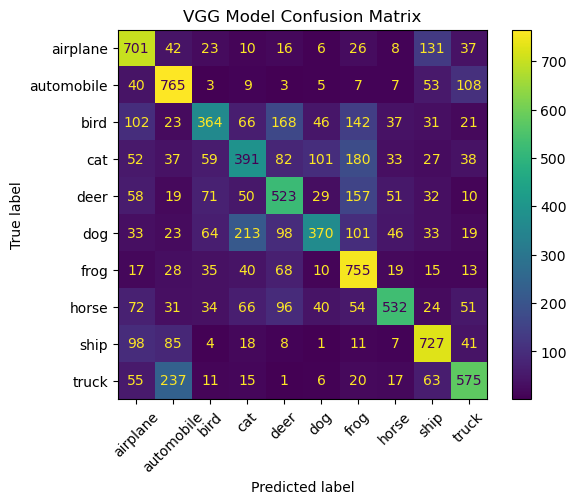

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_probs = vgg_model.predict(x_test_norm)

y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])
disp.plot(cmap='viridis', xticks_rotation=45)
plt.title("VGG Model Confusion Matrix")
plt.show()

**Comment here :**

*the model performs poorly with animal categories


...

*    Print the test accuracy for the trained model.

In [17]:
test_loss, test_acc = vgg_model.evaluate(x_test_norm, y_test_cat, verbose=0)
print(f"Test accuracy of VGG model: {test_acc:.4f}")

Test accuracy of VGG model: 0.5703


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [18]:
from keras.backend import clear_session
clear_session()

In [20]:
model_vgg = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

Epoch 1/10


2025-07-12 15:08:50.390519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - ETA: 0s - loss: 1.6213 - accuracy: 0.4278

2025-07-12 15:10:31.268796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - 107s 1s/step - loss: 1.6213 - accuracy: 0.4278 - val_loss: 1.5671 - val_accuracy: 0.4442
Epoch 2/10
98/98 [==============================] - 105s 1s/step - loss: 1.5782 - accuracy: 0.4433 - val_loss: 1.5677 - val_accuracy: 0.4462
Epoch 3/10
98/98 [==============================] - 103s 1s/step - loss: 1.5390 - accuracy: 0.4589 - val_loss: 1.4916 - val_accuracy: 0.4746
Epoch 4/10
98/98 [==============================] - 103s 1s/step - loss: 1.4967 - accuracy: 0.4738 - val_loss: 1.5259 - val_accuracy: 0.4583
Epoch 5/10
98/98 [==============================] - 103s 1s/step - loss: 1.4676 - accuracy: 0.4861 - val_loss: 1.4629 - val_accuracy: 0.4780
Epoch 6/10
98/98 [==============================] - 104s 1s/step - loss: 1.4355 - accuracy: 0.4958 - val_loss: 1.4208 - val_accuracy: 0.4946
Epoch 7/10
98/98 [==============================] - 103s 1s/step - loss: 1.4052 - accuracy: 0.5033 - val_loss: 1.3784 - val_accuracy: 0.5095
Epoch 8/10
98/98 [======

2025-07-12 15:26:06.975411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 6s 20ms/step


<Figure size 1000x800 with 0 Axes>

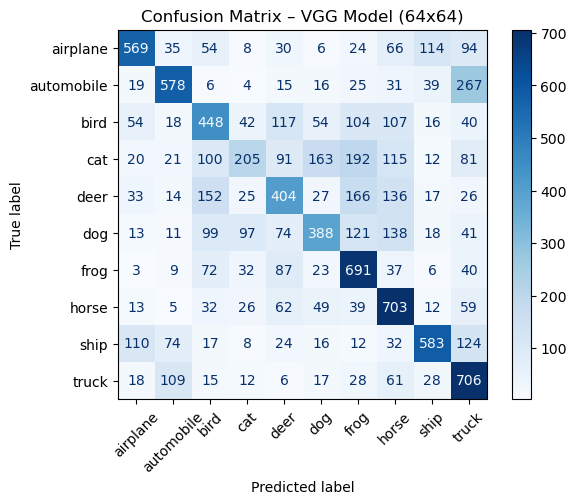

In [24]:
import tensorflow as tf

model_vgg.compile(
    loss = "categorical_crossentropy",
    optimizer = "sgd",
    metrics = ["accuracy"]
)
x_train_resized = tf.image.resize(x_train_norm, [64, 64])
x_test_resized = tf.image.resize(x_test_norm, [64, 64])

vgg_history = model_vgg.fit(
    x_train_resized, y_train_cat,
    epochs = 10,
    batch_size = 512,
    validation_data = (x_test_resized, y_test_cat)
)

y_pred_probs = model_vgg.predict(x_test_resized)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix – VGG Model (64x64)")
plt.show()

the model still performs well on the classes where the visual features are distinct.

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_introducing non-linearity into the neural network

_they allow the network to learn complex patterns

2 - Key Differences between sigmoid and softmax:



_sigmoid is used in binary classifications  and softmax in multi-class classification


3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_categorical crossentropy is used for multi-class classification problems and binary crossentropy is used when there are only two classes
